<h1 align="center">
    <strong><u>Senyals i Sistemes - Pràctica 1</u></strong>
    <br/><br/>
            Operacions bàsiques sobre seqüències: Convolució i correlació
<h1/>

## Instruccions bàsiques

L'enunciat consta d'una sèrie d'explicacions, fragments de codi Python pre-programat i també d'un conjunt de <span style="color:red; font-size:16px;">Qüestions</span>. Aquestes qüestions estan relacionades amb el __Qüestionari Atenea__ associat a la pràctica.

  1. Haureu de tenir el __qüestionari obert en paral·lel__ amb aquest document de JupyterLab.
  2. Algunes preguntes demanen __dades inicials__. Trobareu aquestes dades a la pregunta corresponent del qüestionari. A cada usuari se li assignen valors diferents.
  3. En les zones de codi que estan en blanc, __programareu la vostra solució__ a la qüestió que se us planteja, i __consignareu els resultats__ a les caselles corresponents del qüestionari.
  4. En acabar, no oblideu de __tancar__ i enviar el qüestionari perquè sigui corregit.

## <span style="color:red">__Qüestió 1__</span> - Identificació dels membres del grup de treball

Aneu a la pregunta 1 del qüestionari i indiqueu els membres que formen el grup de treball

# <span style="color:#BB44DD">Part 1: Convolució discreta 1D</span>

## Introducció

En la primera part de la pràctica es treballaran diversos aspectes de la **convolució de senyals**, per tal d'entendre bé el funcionament d'aquesta operació essencial en el processament del senyal.

### Preàmbul: Declaració de les biblioteques externes

<span style="color:red">Descomenteu una de les 3 opcions de presentació de les gràfiques</span> i executeu el fragment de codi

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


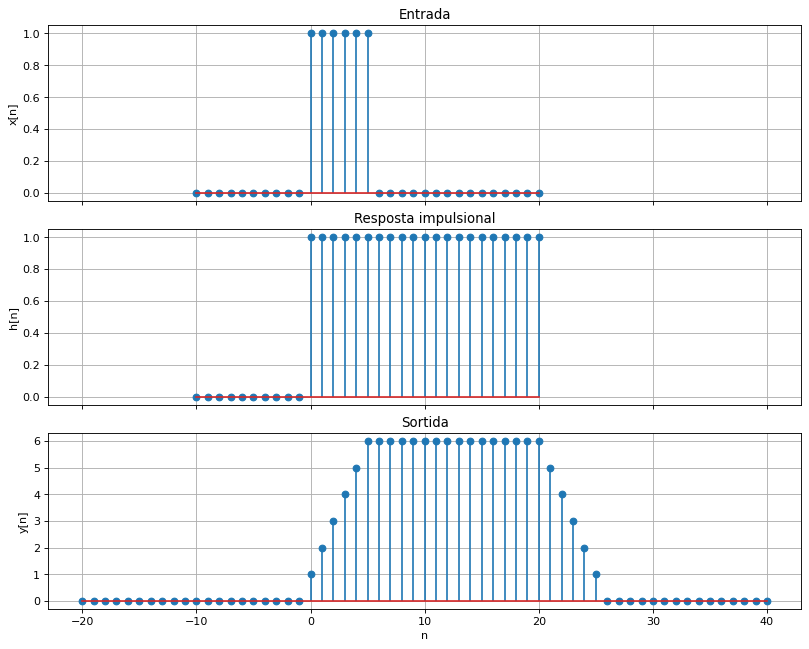

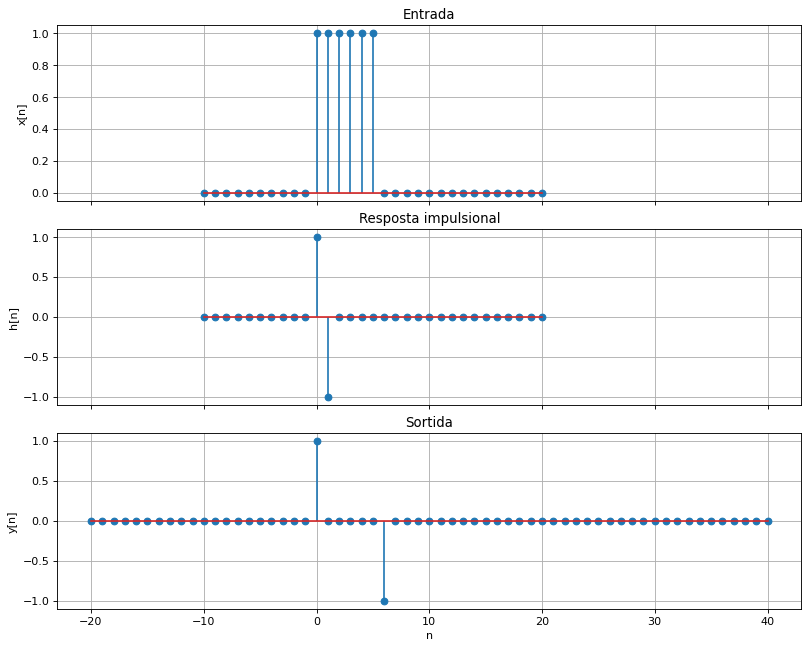

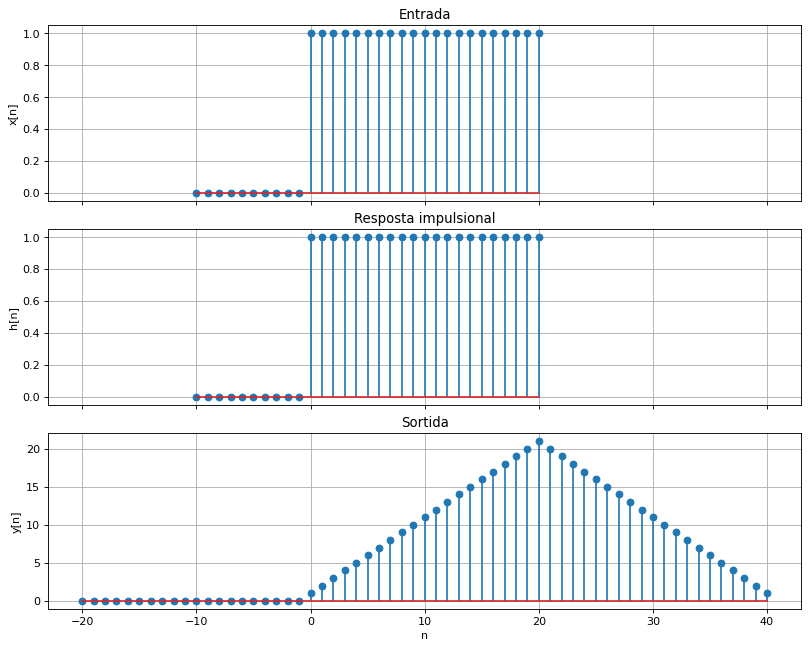

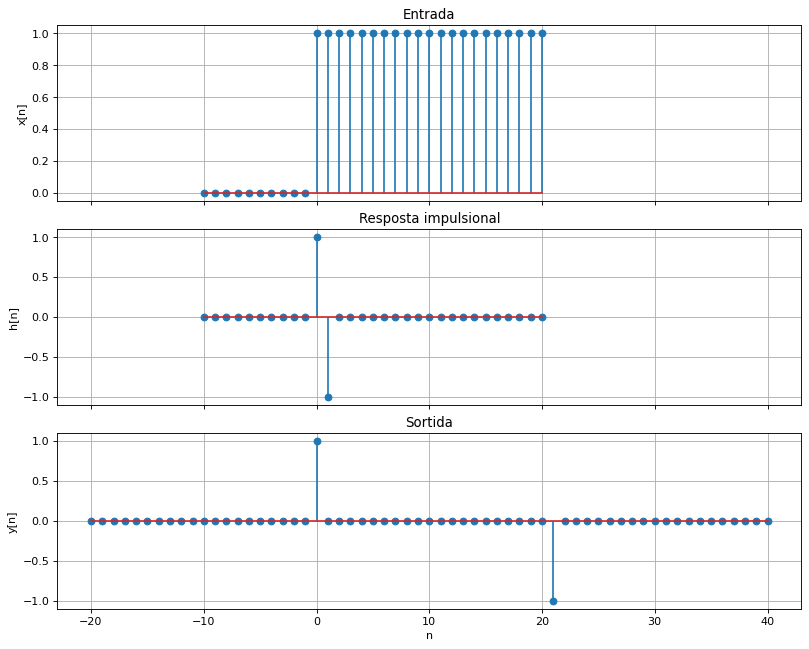

In [8]:
import numpy as np
from scipy.signal import convolve

##### 3 maneres diferents de presentar les gràfiques
# INLINE: Les gràfiques es pinten just a sota la cel·la que les genera, però no són interactives. 
#         Útil per crear un PDF autocontingut amb enunciat i resultats
#
# WIDGET: Similar a l'anterior però les gràfiques són interactives i redimensionables.
#         - Si obrim moltes gràfiques simultànies es pot queixer per manca de recursos
#         - Cal instal·lar el paquet 'ipympl' (no ve per defecte) per tal que funcioni
#
#     QT: Cada gràfica es crea en una finestra a part.
#         És l'opció més flexible però també dificulta documentar els resultats
#
# DESCOMENTEU UNA DE LES TRES OPCIONS  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#%matplotlib inline
#%matplotlib widget 
#%matplotlib qt
import matplotlib.pyplot as plt

# Fem la mida per defecte dels plots una mica més gran
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 80

def plotconv(Tx, Th, Ty):
    """
    Presenta les gràfiques dels 3 senyals típics en una convolució («x», «h» i «y») apilats de manera que es puguin apreciar bé les seves relacions temporals
    
    Paràmetres:
      Tx: Una TUPLA (x,nx) que conté, en aquest ordre, el senyal «x» i la seqüencia d'índexs associada, «nx».
      Th: Una TUPLA (h,nh) que conté, en aquest ordre, el senyal «h» i la seqüencia d'índexs associada, «nh».
      Ty: Una TUPLA (y,ny) que conté, en aquest ordre, el senyal «y» i la seqüencia d'índexs associada, «ny».
      
      Òbviament, els dos vectors de cada TUPLA han de tenir la MATEIXA LONGITUD.
      
    Retorna: Res (però dibuixa les 3 gràfiques)
    """
    fig, (axX, axH, axY) = plt.subplots(3, 1, sharex=True, constrained_layout=True)
    axX.stem(Tx[1], Tx[0])
    axX.grid(True)
    axX.set_ylabel('x[n]')
    axX.set_title('Entrada')
    axH.stem(Th[1], Th[0])
    axH.grid(True)
    axH.set_ylabel('h[n]')
    axH.set_title('Resposta impulsional')
    axY.stem(Ty[1], Ty[0])
    axY.grid(True)
    axY.set_ylabel('y[n]')
    axY.set_xlabel('n')
    axY.set_title('Sortida')


# ASSIGNEU valors a les variables segons les dades de la pregunta 2 del qüestionari.
Nmin = -10
Nmax = 20

# Definim el vector d'índexs amb les dades que ens han tocat. Aquest vector servirà tant pel senyal x[n] com per h[n]
n = np.arange(Nmin, Nmax+1)       # La funció «arange(a,b)» genera valors des de «a» fins a «b-1»

# CALCULEU: Quina és la longitud M del vector n?
M = Nmax - Nmin + 1

# GENEREU els senyals x1, x2, h1 i h2 com a arrays NumPy de manera que representin els senyals demanats. 
# Baseu-vos en el model que es dóna pel senyal x2
x1 = 1.0 * (n >= 0) - 1.0 * (n >= 6)
x2 = 1.0 * (n >= 0)     # (n >= 0) dóna «True» (equivalent a 1) quan n>=0 i «False» (equivalent a 0) altrament.
h1 = 1.0 * (n >= 0)
h2 = 1.0 * (n == 0) - 1.0 * (n == 1)

print(x1)
print(x2)
print(h1)
print(h2)

# CALCULEU les 4 convolucions demanades usant la funció «convolve(x1,x2)» del paquet «scipy» que s'ha importat al principi
y11 = convolve(x1, h1)
y12 = convolve(x1, h2)
y21 = convolve(x2, h1)
y22 = convolve(x2, h2)

# ESCRIVIU la instrucció per obtenir la longitud L dels vectors obtinguts
L = len(y11)

# GENEREU un vector d'índexs adequat a les convolucions que acabeu de calcular
# (Proveu les diferents combinacions que us suggereix la pregunta 2 del qüestionari i escolliu la correcta)
ny = np.arange(2 * Nmin, 2 * Nmax + 1)

# Finalment, PINTEU les gràfiques dels 4 casos segons el model que s'indica pel primer cas
plotconv( (x1,n), (h1,n), (y11,ny) )
plotconv( (x1,n), (h2,n), (y12,ny) )
plotconv( (x2,n), (h1,n), (y21,ny) )
plotconv( (x2,n), (h2,n), (y22,ny) )

plt.show()

### Preàmbul: Definició de funcions útils

Executeu el fragment de codi. Fixeu-vos en com es declara la funció i com se li han de passar els paràmetres.

In [12]:
def plotconv(Tx, Th, Ty):
    """
    Presenta les gràfiques dels 3 senyals típics en una convolució («x», «h» i «y») apilats de manera que es puguin apreciar bé les seves relacions temporals
    
    Paràmetres:
      Tx: Una TUPLA (x,nx) que conté, en aquest ordre, el senyal «x» i la seqüencia d'índexs associada, «nx».
      Th: Una TUPLA (h,nh) que conté, en aquest ordre, el senyal «h» i la seqüencia d'índexs associada, «nh».
      Ty: Una TUPLA (y,ny) que conté, en aquest ordre, el senyal «y» i la seqüencia d'índexs associada, «ny».
      
      Òbviament, els dos vectors de cada TUPLA han de tenir la MATEIXA LONGITUD.
      
    Retorna: Res (però dibuixa les 3 gràfiques)
    """
    fig, (axX, axH, axY) = plt.subplots(3, 1, sharex=True, constrained_layout=True)
    axX.stem(Tx[1], Tx[0])
    axX.grid(True)
    axX.set_ylabel('x[n]')
    axX.set_title('Entrada')
    axH.stem(Th[1], Th[0])
    axH.grid(True)
    axH.set_ylabel('h[n]')
    axH.set_title('Resposta impulsional')
    axY.stem(Ty[1], Ty[0])
    axY.grid(True)
    axY.set_ylabel('y[n]')
    axY.set_xlabel('n')
    axY.set_title('Sortida')


## <span style="color:red">__Qüestió 2__</span> - Visualització de les convolucions amb Python

Siguin els senyals següents:

  - $x_1[n] = p_6[n]$ (pols rectangular de longitud 6 mostres)
  - $x_2[n] = u[n]$

i els sistemes amb resposta impulsional:

  - $h_1[n] = u[n]$
  - $h_2[n] = \delta[n] - \delta[n-1]$
  
En aquest exercici es tracta de calcular __per simulació amb python__ la resposta de cadascun dels 2 sistemes a cadascuna de les 2 entrades, és a dir:

  - $y_{11}[n] = x_1[n] * h_1[n]$
  - $y_{12}[n] = x_1[n] * h_2[n]$
  - $y_{21}[n] = x_2[n] * h_1[n]$
  - $y_{22}[n] = x_2[n] * h_2[n]$

Si no ho heu fet ja a classe, calculeu teòricament el resultat de les 4 convolucions anteriors.

Completeu i executeu el fragment de codi de la cel·la següent. A la vista del resultat, __escolliu la resposta correcta a la pregunta 2 del qüestionari__.

In [15]:
# ASSIGNEU valors a les variables segons les dades de la pregunta 2 del qüestionari.
Nmin = 
Nmax = 

# Definim el vector d'índexs amb les dades que ens han tocat. Aquest vector servirà tant pel senyal x[n] com per h[n]
n = np.arange(Nmin, Nmax+1)       # La funció «arange(a,b)» genera valors des de «a» fins a «b-1»

# CALCULEU: Quina és la longitud M del vector n?
M = 

# GENEREU els senyals x1, x2, h1 i h2 com a arrays NumPy de manera que representin els senyals demanats. 
# Baseu-vos en el model que es dóna pel senyal x2
x1 =
x2 = 1.0 * (n >= 0)     # (n >= 0) dóna «True» (equivalent a 1) quan n>=0 i «False» (equivalent a 0) altrament.
h1 =
h2 =

# CALCULEU les 4 convolucions demanades usant la funció «convolve(x1,x2)» del paquet «scipy» que s'ha importat al principi
y11 = 
y12 = 
y21 = 
y22 = 

# ESCRIVIU la instrucció per obtenir la longitud L dels vectors obtinguts
L = 

# GENEREU un vector d'índexs adequat a les convolucions que acabeu de calcular
# (Proveu les diferents combinacions que us suggereix la pregunta 2 del qüestionari i escolliu la correcta)
ny = np.arange( ... )

# Finalment, PINTEU les gràfiques dels 4 casos segons el model que s'indica pel primer cas
plotconv( (x1,n), (h1,n), (y11,ny) )
plotconv( ... )
plotconv( ... )
plotconv( ... )

SyntaxError: invalid syntax (2993054041.py, line 2)

## <span style="color:red">__Qüestió 3__</span> - Vector d'índexs de la sortida

Si escriviu 

``` python
ny = np.arange(2*min(n), 2*max(n) + 1)
```

podeu visualitzar correctament el resultat? Repetiu la qüestió 2 amb «`ny`» definit d'aquesta manera i __escolliu la resposta correcta al qüestionari__.

### >>> Comenteu la vostra resposta:

## <span style="color:red">__Qüestió 4__</span> - Validesa del càlcul numèric

Observeu atentament els resultats obtinguts via càlcul numèric de la convolució amb Python i compareu-los amb els resultats teòrics calculats a l'estudi previ. Coincideixen o difereixen?

A partir de les vostres conclusions, __responeu la pregunta del qüestionari__.

### >>> Comenteu la vostra resposta:

___

# <span style="color:#BB44DD">Part 2: Implicacions de la (no) causalitat</span>
##  <span style="color:#BB44DD">Aplicació a la reducció de les variacions ràpides d'un senyal</span>

## Introducció

En aquesta part aplicarem un filtre de «mitjana» (concretament, de mitjana mòbil) per tal d'eliminar les fluctuacions ràpides i visualitzar millor la tendència de les dades del fitxer Ibex35.csv. Usarem el paquet __Pandas__ per a llegir el fitxer i generar un DataFrame, df, amb columnes per a la data i el preu al tancament de l'índex borsari IBEX 35 (una mostra per dia).

Les dades borsàries estan agafades d'una [pàgina web](https://es.finance.yahoo.com/quote/%5EIBEX/history/) que proporciona l'històric de valors de l'Íbex 35. Per tant, són dades reals però a les quals hem aplicat un __tractament previ__ per facilitar el seu ús en aquesta pràctica. El que s'ha fet és:

  - Reduir el nombre de columnes al mínim necessari.
  - Truncar les dades __<span style="color:red;">fent que la data inicial sigui el dia 1 de gener de 2000</span>__. De cara als objectius docents que volem assolir serà un nombre més que suficient.
  - Completar els dies que faltaven. Com sabeu, els caps de setmana i festius la borsa no opera (no hi ha dades) i això fa que els valors del fitxer no estiguin equiespaiats. Per tal d'evitar malentesos, hem completat els valors que falten a base d'extendre el valor de tancament del darrer dia operatiu.

__Baixeu el fitxer `Ibex35.csv` al vostre ordinador__ i deseu-lo a la mateixa carpeta on teniu aquest _Notebook_. Si doneu un cop d'ull al contingut del fitxer, observareu que té 2 columnes de dades:

  - «Data»:       Data en format YYYY-MM-DD
  - «Tancament»:  Valor de l'índex al tancament de la sessió

La __primera fila__ conté els __noms__ de les columnes.

Executeu el codi següent per tal de llegir el fitxer i emmagatzemar-lo en una variable interna:

### Declaració de les biblioteques usades i lectura de les dades

In [ ]:
import pandas as pd

dades = pd.read_csv(
    'Ibex35.csv',                     # Fitxer de dades (ha d'estar a la mateixa carpeta que aquest Notebook, o indicar la ruta)
    delimiter = ',',                  # Els camps estan delimitats per comes
    header = 0,                       # 1a. fila conté noms de les columnes
    usecols = ['Data', 'Íbex'],  # Seleccionem columnes concretes (totes, en aquest cas)
    index_col = 'Data',               # 1a. columna (dates) serà l'índex
    parse_dates = ['Data'],           # Interpreta i converteix les dates
)

# Visualitzem un fragment de la taula. Fixeu-vos en les dates inicial i final de l'interval
dades

Dibuixem la gràfica de la sèrie temporal. Podem usar la funció `plot` de `Matplotlib`, però en aquest cas és més senzill usar la funció `plot` incorporada al `Pandas`, que s'encarrega de tots els detalls (llegenda, etiquetes, eix d'abscisses, etc.) per nosaltres:

In [ ]:
tmp = dades.plot(grid=True, title="Valor de l'Íbex 35 (2000-2024)")     # Dibuix automàtic. L'assignació del «resultat» a la variable 'tmp' és simplement per evitar la impressió d'un missatge per pantalla.

## <span style="color:red">__Qüestió 5__</span> - Definició de la mitjana mòbil

La mitjana mòbil d'ordre M d'un senyal discret x[n] proporciona en cada instant la mitjana aritmètica entre el valor actual de l'entrada i els M-1 valors anteriors:

\begin{equation}
  y[n] = \frac{1}{M}\sum_{k=0}^{M-1} x[n-k] \tag{1}
\end{equation}


Atès que l'equació de convolució és $y[n] = \sum_{k=-\infty}^{\infty} h[k]\cdot x[n-k]$, reflexioneu quina hauria de ser la resposta impulsional que caracteritza la mitjana mòbil i, en acabat, __ompliu les caselles de la Qüestió 5 del qüestionari__.

## <span style="color:red">__Qüestió 6__</span> - Càlcul i experimentació amb mitjanes mòbils d'ordres diversos

En el fragment de codi següent, calculeu les respostes impulsionals de 3 sistemes que calculen la mitjana mòbil amb M=7 (una setmana), M=91 (un trimestre) i M=365 (un any). Anomenarem a aquestes respostes impulsionals `hs`, `ht`i `ha` respectivament.

Seguidament, feu la convolució de cadascuna d'aquestes respostes impulsionals amb les dades de l'Íbex. Per tal d'__extreure les dades__ del DataFrame en forma d'array NumPy, utilitzeu la propietat `values` del DataFrame tal i com es mostra al codi adjunt. També és útil __extreure els valors de l'eix d'abcisses__ (dates) per poder-los usar posteriorment per dibuixar les dades; això es fa amb la propietat `index` del DataFrame.

In [ ]:
# Extracció de les dades de DataFrame en vectors individuals
x = dades['Íbex'].values        # Extraiem les dades (valors de l'Íbex)
n_x = dades['Íbex'].index       # Extraiem també el vector de dates associat al vector anterior (l'utilitzarem més endavant)

# GENEREU les respostes impulsionals demanades
hs =                # Mitjana setmanal (M = 7)
ht =                # Mitjana trimestral (M = 91)
ha =                # Mitjana anual (M = 365)

# CALCULEU per cada cas les convolucions amb les dades de l'íbex per tal de computar les mitjanes mòbils setmanals, trimestrals i anuals.
ys = 
yt = 
ya = 

### Visualització de resultats

Ara volem visualitzar __SUPERPOSADES__ (per facilitar la seva comparació) les 2 gràfiques següents:

  1. La gràfica dels valors de l'Íbex en funció del temps
  2. La gràfica de la mitjana mòbil de les dades anteriors, en funció del temps
  
Tanmateix, el problema immediat que tenim a l'hora de fer aquesta visualització és __quin vector de temps hem d'assignar a la resposta__. Per tal de reflexionar-hi, proveu de respondre mentalment les qüestions següents:

  * Les seqüències $x[n]$, $y_s[n]$, $y_t[n]$ i $y_a[n]$, tenen totes la mateixa __longitud__? (podeu usar la funció `len()` per comprovar-ho)
  * A quina __data__ correspon la _primera mostra_ de cada seqüència $y_i[n]$?
  
### Generació del vector de dates

La funció `date_range` del __Pandas__ permet de generar un array de dates correlatives amb certs valors inicials, finals, increments, etc. Pels nostres interessos els paràmetres importants són `start` (data inicial), `freq` (cada quan tenim un valor, que per nosaltres serà '1D' = un valor per dia) i `periods` (nombre de valors a generar).

Amb aquesta informació, genereu els vectors de dates necessaris per acompanyar els senyals ys, yt i ya calculats anteriorment:

In [ ]:
# GENEREU els vectors de dates demanats usant la funció «date_range» de Pandas
n_ys = pd.date_range( ... )
n_yt = 
n_ya = 

Finalment, pinteu les figures usant la funció auxiliar definida a continuació:

In [ ]:
def plotibex(Tx, Ty, mitjana):
    """
    Presenta 2 gràfiques SUPERPOSADES corresponents a les dades de l'íbex («x») i la seva mitjana mòbil («y»)
    
    Paràmetres:
      Tx: Una TUPLA (x,nx) que conté, en aquest ordre, el senyal «x» i la seqüencia d'índexs associada, «nx».
      Ty: Una TUPLA (y,ny) que conté, en aquest ordre, el senyal «y» i la seqüencia d'índexs associada, «ny».
      mitjana: Una de les 3 CADENES DE CARÀCTERS 'setmanal', 'trimestral' o 'anual' que indica la profunditat de la mitjana mòbil.
      
      Òbviament, els dos vectors de cada TUPLA han de tenir la MATEIXA LONGITUD.
      
    Retorna: Res (però dibuixa les 2 gràfiques superposades)
    """
    if mitjana not in {'setmanal','trimestral','anual'}:
        missatge = "Heu d'assignar al paràmetre «mitjana» el valor 'setmanal','trimestral' o 'anual'"
        print(missatge)
        raise Exception(missatge)
    fig, ax = plt.subplots(1, 1)
    ax.plot(Tx[1], Tx[0], label='Dades diàries')
    ax.plot(Ty[1], Ty[0], label='Mitjana {}'.format(mitjana))
    ax.grid(True)
    ax.set_ylabel('Ibex 35')
    titol = "Dades de l'íbex (real i mitjana {})".format(mitjana)
    ax.set_title(titol)
    ax.legend()

In [ ]:
# PINTEU les dades de l'íbex i les seves mitjanes usant la funció «plotibex»
plotibex( ... )    # Setmanal
plotibex( ... )    # Trimestral
plotibex( ... )    # Anual

__Finalment, RESPONEU la Qüestió 6__ del qüestionari.

## <span style="color:red">__Qüestió 7__</span> - Alineació entre entrada i sortida

A la vista de les gràfiques que acabeu d'obtenir, reflexioneu sobre les següents qüestions:

  1. Creieu que l'entrada i la sortida estan aliniades?
  2. En cas negatiu, quin pot ser el motiu del desajustament?

La manca d'alineació entre les dades i la mitjana, en cas que existeixi, és més senzilla de detectar en les zones on les dades tenen un màxim o un mínim, perquè intuïtivament voldríem que la mitjana també tingués un màxim o un mínim en el mateix punt.

  3. Podeu donar un valor aproximat, per inspecció visual, del desalineament entre les dades diàries i les mitjanes? (us pot ser útil fer _zoom_ al voltant d'algun màxim)
  4. El valor del desaliniament té alguna relació amb la longitud M de la mitjana mòbil?
  
Després d'aquestes reflexions, __responeu la pregunta 7 del qüestionari__.

## <span style="color:red">__Qüestió 8__</span> - Mitjana mòbil centrada


Una mitjana mòbil __centrada__ d'ordre M d'un senyal discret x[n] calcula en cada instant la mitjana aritmètica entre el valor actual de l'entrada i un nombre igual de valors anteriors i posteriors a aquest:

\begin{equation}
  y[n] = \frac{1}{M}\cdot\displaystyle\sum_{k=-\frac{M-1}{2}}^{\frac{M-1}{2}} x[n-k] \tag{2}
\end{equation}

Atès que l'equació de convolució és $y[n] = \sum_{k=-\infty}^{\infty} h[k]\cdot x[n-k]$,
podem aconseguir implementar l'equació (1) si fem que la resposta
impulsional del filtre sigui un *pols rectangular* de longitud M i 
amplitud $\frac{1}{M}$, però aquest cop __centrat a l'origen de coordenades__, és a dir, __desplaçat (M-1)/2 mostres cap a l'esquerra__.

\begin{equation}
  h[n] = \frac{1}{M} \cdot p_M\bigg[n + \frac{M-1}{2}\bigg] 
\end{equation}

Tenint en compte aquestes consideracions, __responeu la pregunta 8 del qüestionari__.

## <span style="color:red">__Qüestió 9__</span> - Implementació en Python de la mitjana mòbil centrada

Com ja sabeu, els «arrays» NumPy comencen sempre a l'índex 0. Per tant, no podem implementar directament amb ells respostes impulsionals no causals.

De tota manera, a la primera part de la pràctica hem vist que la causalitat o no d'un senyal discret emmagatzemat a l'ordinador com una seqüència de valors __és una qüestió d'interpretació__: <span style="color:red">en funció del vector de temps que associem a la seqüència, aquesta pot representar un senyal causal o no causal</span>. Alhora, recordeu una propietat important de la convolució de seqüències discretes:

> En una convolució $y[n] = x[n] * h[n]$, l'__índex__ de la primera mostra no nul·la del senyal de sortida $y[n]$ és la __suma dels índexs__ de les primeres mostres no nul·les dels senyals $x[n]$ i $h[n]$.

D'altra banda, si no voleu jugar amb els índexs, una altra opció és __ajustar el nombre de mostres al principi__ de les seqüències per tal de desplaçar-les visualment.

Tenint en compte aquestes consideracions, feu algunes proves a les cel·les de codi adjacents i __responeu la pregunta 9 del qüestionari__.

In [ ]:
# Aliniament pel mètode 1: creació d'un vector d'índexs adient

from datetime import date,timedelta          # Necessari per treballar amb dates i increments de dates
INICIAL = date(2000, 1, 1)                   # Data inicial de les dades d'entrada
M = 365                                      # Longitud de la mitjana mòbil anual (en dies)
OFFSET = timedelta(days= ... )       # <<<<<<<<< INDIQUEU el nombre de dies a sumar/restar (cas que tingui signe negatiu) a l'índex per centrar la mitjana
n_ya = pd.date_range(start=INICIAL+OFFSET, freq='1D', periods=len(ya))   # Creem el vector d'índexs amb la data inicial i longitud adients
plotibex( (x,n_x), (ya,n_ya), 'anual' )

In [ ]:
# Aliniament pel mètode 2: retocar el nombre de zeros de la sortida

ya2 = .....       # CREEU un nou vector «ya» afegint zeros/eliminant mostres al principi per tal que les seves mostres quedin aliniades amb les de l'entrada

# Recalculem un nou vector d'índexs ja que el nombre de mostres ha canviat
# (Una alternativa és retallar també zeros del final, per tal que la longitud de la sortida coincideixi amb la de l'entrada)
n_ya2 = pd.date_range(start='1/1/2000', freq='1D', periods=len(ya2))
plotibex( (x,n_x), (ya2,n_ya2), 'anual' )

___

# <span style="color:#BB44DD">Part 3: Correlació</span>

## Introducció

La __correlació__ és una operació útil per detectar similituds entre senyals (tant si estan alineats en el temps com si no) i per cercar patrons dins d'un senyal. Això té moltes aplicacions pràctiques com ara comunicacions, astronomia, medicina, economia i un llarg etcètera. Així mateix, l'__autocorrelació__ (és a dir, la correlació entre un senyal i ell mateix) pot ser útil per tal d'estimar periodicitats.

En aquesta part utilitzarem la correlació per localitzar automàticament un determinat patró, $p[n]$, dins d'un senyal $x[n]$: la posició el __màxim__ de la correlació entre $x[n]$ i $p[n]$ indicarà la ubicació del patró dins del senyal.

Explicat breument, per fer la correlació col·loquem el patró «a sobre» del senyal a explorar i fem la suma del producte mostra a mostra de les parts que se solapen. La idea és que si les parts que se solapen són iguals, la suma del producte serà màxima en aquella posició.

Matemàticament la correlació $r_{xp}$ entre els senyals $x$ i $p$ (que aquí suposarem reals) es defineix com:

\begin{equation}
  r_{xp}[n] = \sum_{k=-\infty}^{\infty}x[k] p[k-n]
\end{equation}

Com es pot apreciar, l'operació de la correlació té notables similituds amb la de la convolució. De fet es pot demostrar que:

$$
  r_{xp}[n] = x[n] * p[-n]
$$

És a dir que calcular una correlació entre 2 senyals és el mateix que fer la seva convolució però __sense «girar» el segon senyal__. Això permet implementar la correlació com la sortida d'un sistema LTI amb resposta impulsional $h[n] = p[-n]$. Aquest sistema rep el nom de __filtre adaptat__.

Potser la correlació no és la manera més eficient de cercar un patró dins d'una seqüència, però el __gran avantatge__ de la correlació és que __funciona encara que la versió del patró dins del senyal no sigui *exactament* igual al patró original__; per exemple, en presència de __soroll__. És un mètode molt útil, per exemple, per decidir en quin moment hem de començar a extreure la informació d'un senyal del qual es desconeix en quin instant comença.

## Lectura de les dades

El fitxer `senyals.npy` conté 15 seqüències. Cadascuna d'elles té longitud 1024 i conté una o més instàncies d'un patró p[n]. Utilitzarem la correlació per a localitzar de manera automàtica el patró dins d'un dels 15 senyals esmentats, x[n].

Primer de tot:

  * Descarregueu el fitxer `senyals.npy` de la pàgina web i deseu-lo a la mateixa carpeta que aquest _Notebook_.
  * Executeu el següent codi per tal de carregar la biblioteca adient, llegir les dades en una variable i definir el patró de cerca

In [ ]:
# Importem la funció «correlate» de la biblioteca SciPy
from scipy.signal import correlate

# Carreguem els senyals. 
senyals = np.load('senyals.npy')

# Definim el patró i calculem la seva longitud. Serà útil més endavant.
patro = np.array([1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1])
M = len(patro)
print('La longitud del patró és de {} mostres'.format(M))

## <span style="color:red">__Qüestió 10__</span> - Cercant un patró dins d'un senyal

Seguiu les instruccions de la Pregunta 11 per tal de seleccionar una de les 15 seqüències i cercar el patró dins la seqüència escollida. __Introduïu a la casella el valor de l'índex del primer element del patró dins la seqüència indicada__. 

Podeu usar la convolució o calcular directament la correlació. Tingueu en compte que les funcions `convolve` i `correlate` accepten un __paràmetre «mode»__ que pot prendre els valors de `full`, `same` i `valid`. __Llegiu la documentació__ de la funció (help correlate) i penseu quin dels tres convé més a les vostres necessitats. Experimenteu.

In [ ]:
# Escollim la seqüència 
seq = 0         # *** CANVIEU AQUEST VALOR SEGONS L'ENUNCIAT DE LA PREGUNTA ***
x = senyals[seq]

# Busqueu el patró dins el senyal «x»

# Imprimiu el resultat
print('El patró es troba a la posició {} dins del senyal'.format(...))

## <span style="color:red">__Qüestió 11__</span> - Codi utilitzat

Quan tingueu el codi anterior depurat, copieu-lo i enganxeu-lo a l'espai de la pregunta 11 del qüestionari.

----

<h1 align="center">Final de l'enunciat de les parts 1, 2 i 3<h1/>
<h3 align="center">Podeu continuar amb el qüestionari de la part 4<h3/>

----